# Data Wrangling - EDA

### Steps
    # Load Dataset
    # Explore Variables and Their Data Types
    # Clean Dataset
        # Remove Null Values
        # Check For Outliers
        # Normalization
            * StandardNormalization
            * MinMaxScalar
            * Z-Score
            * Log Transform...
        # Remove Outliers
            * IQR
            * Visualization
        # Remove Duplicates
# Machine Learning
    # Logistic Regression

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df=sns.load_dataset("titanic")
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

###### sibsp=sibling,spouse,parents

In [3]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe().transpose()

count       mean        std   min      25%      50%   75%       max
survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
sibsp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292

# Data Wrangling

In [6]:
df2=pd.DataFrame(df)
df2

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [7]:
print(df2.isnull().sum())
print(df2.shape)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
(891, 15)


Null Column Percentage

In [8]:
df2.isnull().sum() / len(df2) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
df2.drop(columns=["deck"],inplace=True)
df2.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

Impute Null Columns via Mean\Median\Mode

In [10]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df2["embarked"].mode()

0    S
dtype: object

In [12]:
df2["embarked"].mode()[0]

'S'

In [13]:
df2["embarked"].fillna(df2["embarked"].mode()[0]).isnull().sum()

0

In [14]:
df2["embarked"].fillna(df2["embarked"].mode()[0],inplace=True)

In [15]:
df2["embark_town"].fillna(df2["embark_town"].mode()[0], inplace=True)

In [16]:
df2.isnull().sum() / len(df2) * 100

survived        0.00000
pclass          0.00000
sex             0.00000
age            19.86532
sibsp           0.00000
parch           0.00000
fare            0.00000
embarked        0.00000
class           0.00000
who             0.00000
adult_male      0.00000
embark_town     0.00000
alive           0.00000
alone           0.00000
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

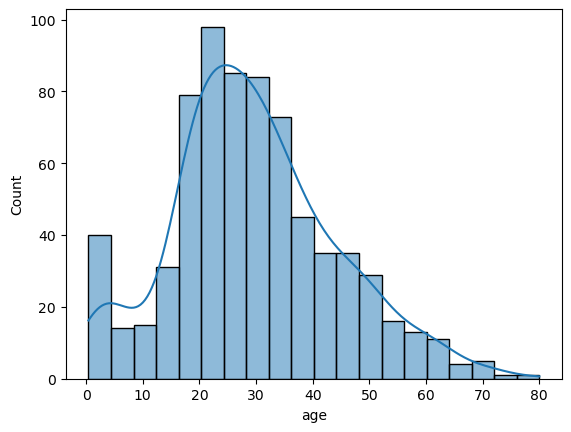

In [17]:

sns.histplot(df2["age"],kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

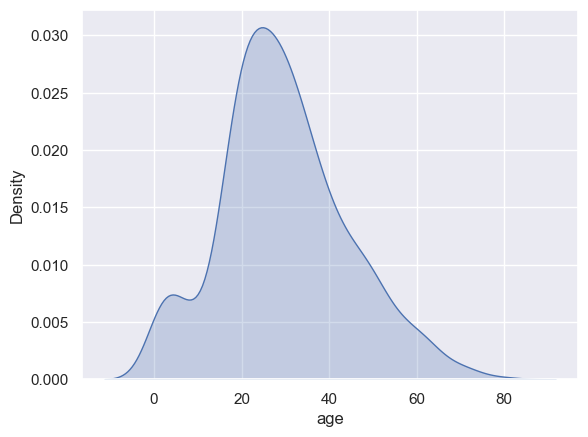

In [18]:
sns.set(style="darkgrid")
sns.kdeplot(df2["age"],fill=True)

Mostly Age is 20-25

In [19]:
print(df2["age"].mean())
print(df2["age"].median())
print(df2["age"].mode()[0])

29.69911764705882
28.0
24.0


In [20]:
df2["age"].fillna(df2["age"].mean(),inplace=True)
df2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Refined Dataset

# Ouliers Removal

In [21]:
df3=df2

In [22]:
df3.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

##### Numeric Columns ={Age, Fare}

<AxesSubplot:>

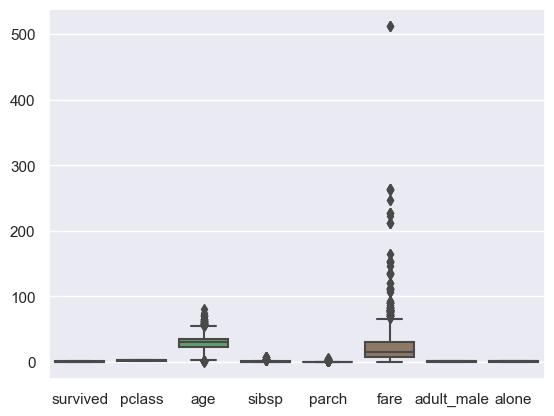

In [23]:
sns.boxplot(data=df3)

In [24]:
sns.boxplot(y=df["age"])

<AxesSubplot:ylabel='age'>

<AxesSubplot:xlabel='sex', ylabel='age'>

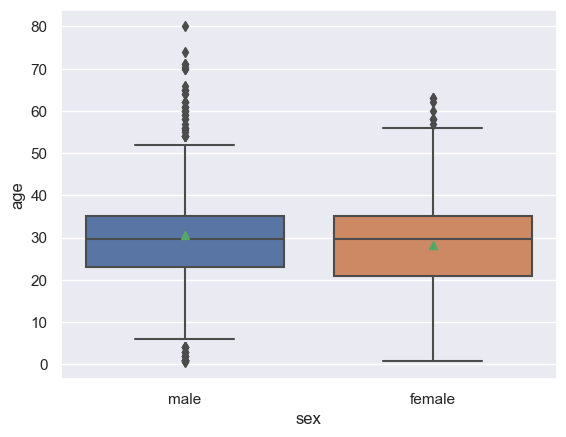

In [25]:
sns.boxplot(data=df3,x="sex",y="age",showmeans=True)

<AxesSubplot:ylabel='fare'>

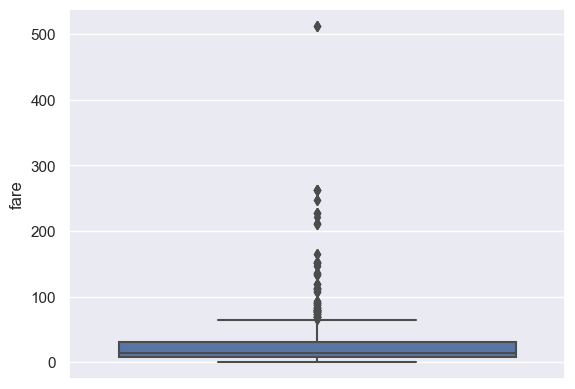

In [26]:
sns.boxplot(y=df["fare"])

<AxesSubplot:xlabel='sex', ylabel='fare'>

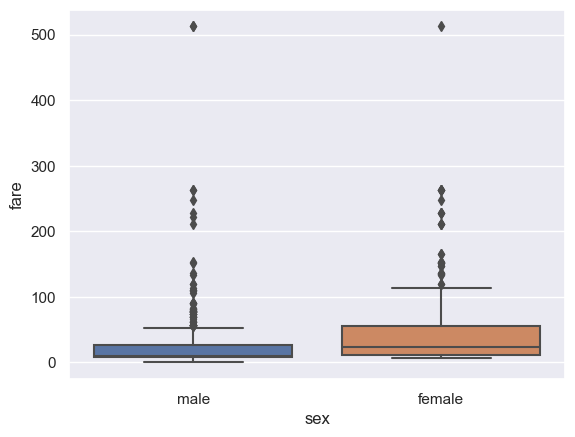

In [27]:
sns.boxplot(x="sex",y="fare",data=df3)

## Using IQR(Inter-quartile Range)

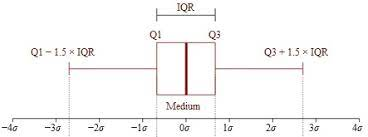
All The Values Under Lowerbound and Higher The Upper bound are the Outliers

In [28]:
import numpy as np

In [29]:
q1,q3=np.percentile(df3["age"],[25,75])
q1,q3

(22.0, 35.0)

In [30]:
IQR=q3-q1
IQR

13.0

In [31]:
lower_bound= q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [32]:
print(lower_bound)
print(upper_bound)

2.5
54.5


### For AGe

In [33]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
Q1,Q3

(20.125, 38.0)

In [34]:
IQR=Q3-Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

In [35]:
print("Quartile-25% = ",Q1)
print("Quartile-75% = ",Q3)
print("InterQuartile Range = ",IQR)
print("Lower Bound = ",lower_bound)
print("Upper Bound= ",upper_bound)

Quartile-25% =  20.125
Quartile-75% =  38.0
InterQuartile Range =  17.875
Lower Bound =  -6.6875
Upper Bound=  64.8125


In [36]:
df3 = df3[(df3["age"] > lower_bound) & (df3["age"] < upper_bound)]

In [37]:
df2.shape

(891, 14)

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     880 non-null    int64   
 1   pclass       880 non-null    int64   
 2   sex          880 non-null    object  
 3   age          880 non-null    float64 
 4   sibsp        880 non-null    int64   
 5   parch        880 non-null    int64   
 6   fare         880 non-null    float64 
 7   embarked     880 non-null    object  
 8   class        880 non-null    category
 9   who          880 non-null    object  
 10  adult_male   880 non-null    bool    
 11  embark_town  880 non-null    object  
 12  alive        880 non-null    object  
 13  alone        880 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 85.2+ KB


In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'After Outlier Removal- Scale Decreased'}, xlabel='sex', ylabel='age'>

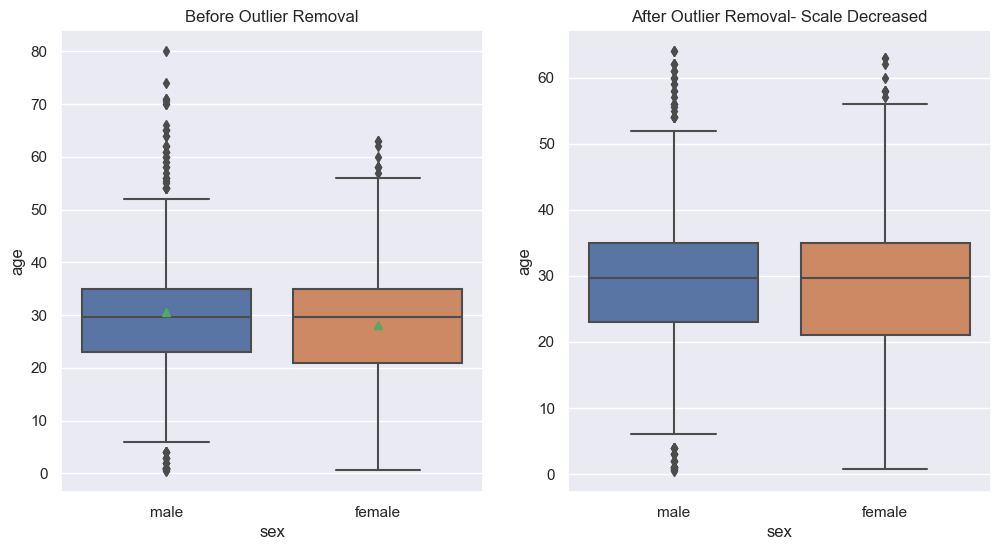

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Before Outlier Removal")
sns.boxplot(data=df2,x="sex",y="age",showmeans=True)
plt.subplot(1,2,2)
plt.title("After Outlier Removal- Scale Decreased")
sns.boxplot(x=df3["sex"],y=df3["age"],)

## For Fare

In [41]:
Q1 = df3["fare"].quantile(0.25)
Q3 = df3["fare"].quantile(0.75)
IQR=Q3 - Q1
IQR

23.0823

In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df3= df3[(df3["fare"] > lower_bound) & (df3["fare"] < upper_bound)]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     765 non-null    int64   
 1   pclass       765 non-null    int64   
 2   sex          765 non-null    object  
 3   age          765 non-null    float64 
 4   sibsp        765 non-null    int64   
 5   parch        765 non-null    int64   
 6   fare         765 non-null    float64 
 7   embarked     765 non-null    object  
 8   class        765 non-null    category
 9   who          765 non-null    object  
 10  adult_male   765 non-null    bool    
 11  embark_town  765 non-null    object  
 12  alive        765 non-null    object  
 13  alone        765 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 74.1+ KB


<AxesSubplot:title={'center':'After Outlier Removal- Scale Decreased'}, xlabel='sex', ylabel='fare'>

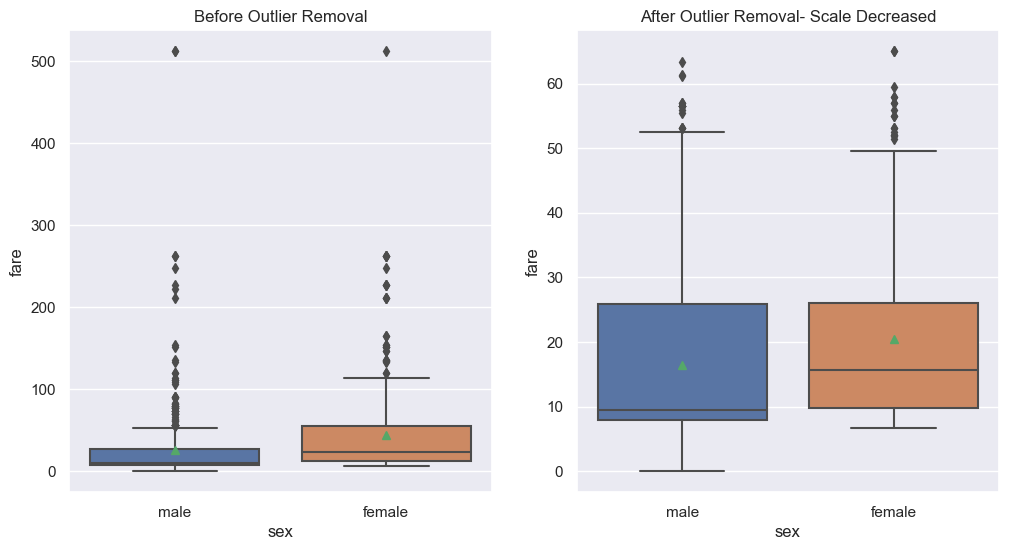

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Before Outlier Removal")
sns.boxplot(data=df2,x="sex",y="fare",showmeans=True)
plt.subplot(1,2,2)
plt.title("After Outlier Removal- Scale Decreased")
sns.boxplot(x=df3["sex"],y=df3["fare"],showmeans=True)

# Drop Duplicates

In [44]:
df3.duplicated().sum()

105

In [45]:
df3[df3.duplicated()]

survived  pclass     sex        age  sibsp  parch     fare embarked  \
47          1       3  female  29.699118      0      0   7.7500        Q   
76          0       3    male  29.699118      0      0   7.8958        S   
77          0       3    male  29.699118      0      0   8.0500        S   
87          0       3    male  29.699118      0      0   8.0500        S   
95          0       3    male  29.699118      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
870         0       3    male  26.000000      0      0   7.8958        S   
877         0       3    male  19.000000      0      0   7.8958        S   
878         0       3    male  29.699118      0      0   7.8958        S   
884         0       3    male  25.000000      0      0   7.0500        S   
886         0       2    male  27.000000      0      0  13.0000        S   

      class    who  adult_male  embark_town alive  alone  
47    Third  woman       False   Queenstown   yes   True  
76    Third    man        True  Southampton    no   True  
77    Third    man        True  Southampton    no   True  
87    Third    man        True  Southampton    no   True  
95    Third    man        True  Southampton    no   True  
..      ...    ...         ...          ...   ...    ...  
870   Third    man        True  Southampton    no   True  
877   Third    man        True  Southampton    no   True  
878   Third    man        True  Southampton    no   True  
884   Third    man        True  Southampton    no   True  
886  Second    man        True  Southampton    no   True  

[105 rows x 14 columns]

In [46]:
df3.shape

(765, 14)

In [47]:
df3=df3.drop_duplicates()
df3.shape

(660, 14)

In [48]:
df3.to_csv("titanic_clean.csv")

# Normalization

### MinMaxScalar - df_max_scaled[column]  / df_max_scaled[column].abs().max()
### Z-Score =  ( df[column] - df[column].mean() ) / df[column].std()
### LogTransform

In [49]:
df4=df3

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scalar = MinMaxScaler()
df4[["age","fare"]]=scalar.fit_transform(df4[["age","fare"]])
df4

survived  pclass     sex       age  sibsp  parch      fare embarked  \
0           0       3    male  0.339415      1      0  0.111538        S   
2           1       3  female  0.402328      0      0  0.121923        S   
3           1       1  female  0.543882      1      0  0.816923        S   
4           0       3    male  0.543882      0      0  0.123846        S   
5           0       3    male  0.460508      0      0  0.130128        Q   
..        ...     ...     ...       ...    ...    ...       ...      ...   
885         0       3  female  0.606795      0      5  0.448077        Q   
887         1       1  female  0.292230      0      0  0.461538        S   
888         0       3  female  0.460508      1      2  0.360769        S   
889         1       1    male  0.402328      0      0  0.461538        C   
890         0       3    male  0.496697      0      0  0.119231        Q   

     class    who  adult_male  embark_town alive  alone  
0    Third    man        True  Southampton    no  False  
2    Third  woman       False  Southampton   yes   True  
3    First  woman       False  Southampton   yes  False  
4    Third    man        True  Southampton    no   True  
5    Third    man        True   Queenstown    no   True  
..     ...    ...         ...          ...   ...    ...  
885  Third  woman       False   Queenstown    no  False  
887  First  woman       False  Southampton   yes   True  
888  Third  woman       False  Southampton    no  False  
889  First    man        True    Cherbourg   yes   True  
890  Third    man        True   Queenstown    no   True  

[660 rows x 14 columns]

In [52]:
df4.describe()

survived      pclass         age       sibsp       parch        fare
count  660.000000  660.000000  660.000000  660.000000  660.000000  660.000000
mean     0.368182    2.446970    0.441665    0.489394    0.392424    0.290325
std      0.482677    0.750462    0.198983    0.943732    0.836716    0.212265
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    0.323687    0.000000    0.000000    0.121474
50%      0.000000    3.000000    0.460508    0.000000    0.000000    0.200000
75%      1.000000    3.000000    0.543882    1.000000    0.000000    0.403846
max      1.000000    3.000000    1.000000    5.000000    6.000000    1.000000

<AxesSubplot:xlabel='sex', ylabel='age'>

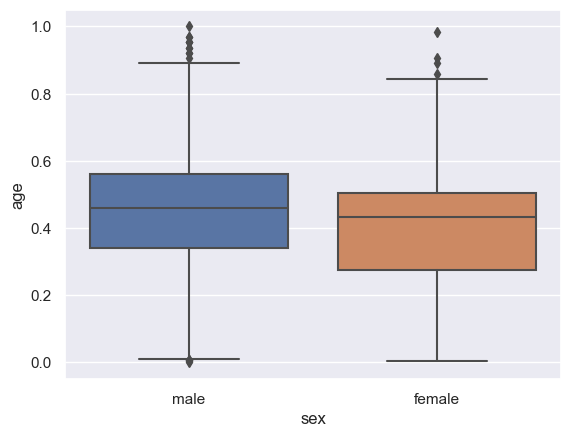

In [53]:
sns.boxplot(x="sex",y="age",data=df4)

# Machine Learning

## Variable Corelations

In [54]:
df4.corr()

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.253922 -0.119699 -0.039718  0.077555  0.209501   
pclass     -0.253922  1.000000 -0.341085  0.134187  0.109315 -0.600768   
age        -0.119699 -0.341085  1.000000 -0.355266 -0.215594  0.066167   
sibsp      -0.039718  0.134187 -0.355266  1.000000  0.392503  0.362772   
parch       0.077555  0.109315 -0.215594  0.392503  1.000000  0.322325   
fare        0.209501 -0.600768  0.066167  0.362772  0.322325  1.000000   
adult_male -0.472153 -0.040858  0.323672 -0.330946 -0.397002 -0.186674   
alone      -0.162483 -0.003258  0.272344 -0.643698 -0.582170 -0.450079   

            adult_male     alone  
survived     -0.472153 -0.162483  
pclass       -0.040858 -0.003258  
age           0.323672  0.272344  
sibsp        -0.330946 -0.643698  
parch        -0.397002 -0.582170  
fare         -0.186674 -0.450079  
adult_male    1.000000  0.435960  
alone         0.435960  1.000000

<AxesSubplot:>

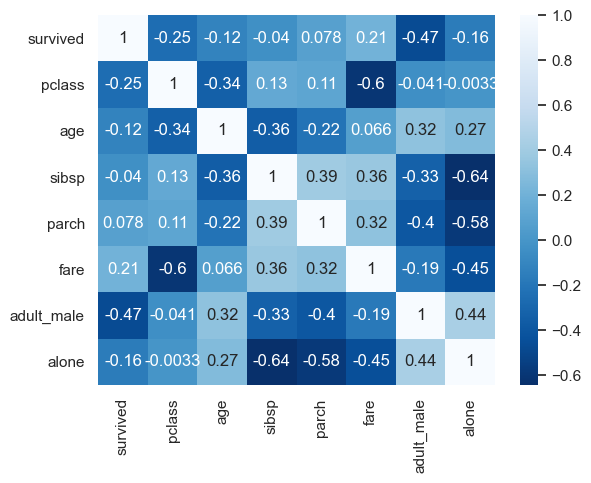

In [55]:
sns.heatmap(df4.corr(),annot=True,cmap='Blues_r')

In [56]:
df4.nunique()

survived         2
pclass           3
sex              2
age             81
sibsp            6
parch            7
fare           201
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

In [57]:
df5=pd.DataFrame(df4)

In [58]:
df5

survived  pclass     sex       age  sibsp  parch      fare embarked  \
0           0       3    male  0.339415      1      0  0.111538        S   
2           1       3  female  0.402328      0      0  0.121923        S   
3           1       1  female  0.543882      1      0  0.816923        S   
4           0       3    male  0.543882      0      0  0.123846        S   
5           0       3    male  0.460508      0      0  0.130128        Q   
..        ...     ...     ...       ...    ...    ...       ...      ...   
885         0       3  female  0.606795      0      5  0.448077        Q   
887         1       1  female  0.292230      0      0  0.461538        S   
888         0       3  female  0.460508      1      2  0.360769        S   
889         1       1    male  0.402328      0      0  0.461538        C   
890         0       3    male  0.496697      0      0  0.119231        Q   

     class    who  adult_male  embark_town alive  alone  
0    Third    man        True  Southampton    no  False  
2    Third  woman       False  Southampton   yes   True  
3    First  woman       False  Southampton   yes  False  
4    Third    man        True  Southampton    no   True  
5    Third    man        True   Queenstown    no   True  
..     ...    ...         ...          ...   ...    ...  
885  Third  woman       False   Queenstown    no  False  
887  First  woman       False  Southampton   yes   True  
888  Third  woman       False  Southampton    no  False  
889  First    man        True    Cherbourg   yes   True  
890  Third    man        True   Queenstown    no   True  

[660 rows x 14 columns]

In [61]:
df5["sex"].replace("male",1,inplace=True)
df5["sex"].replace("female",0,inplace=True)
df5

survived  pclass  sex       age  sibsp  parch      fare embarked  class  \
0           0       3    1  0.339415      1      0  0.111538        S  Third   
2           1       3    0  0.402328      0      0  0.121923        S  Third   
3           1       1    0  0.543882      1      0  0.816923        S  First   
4           0       3    1  0.543882      0      0  0.123846        S  Third   
5           0       3    1  0.460508      0      0  0.130128        Q  Third   
..        ...     ...  ...       ...    ...    ...       ...      ...    ...   
885         0       3    0  0.606795      0      5  0.448077        Q  Third   
887         1       1    0  0.292230      0      0  0.461538        S  First   
888         0       3    0  0.460508      1      2  0.360769        S  Third   
889         1       1    1  0.402328      0      0  0.461538        C  First   
890         0       3    1  0.496697      0      0  0.119231        Q  Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
5      man        True   Queenstown    no   True  
..     ...         ...          ...   ...    ...  
885  woman       False   Queenstown    no  False  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[660 rows x 14 columns]

In [64]:
print(df5["who"].unique())
print(df5["class"].unique())

['man' 'woman' 'child']
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


In [65]:
df5["who"].replace("man",1,inplace=True)
df5["who"].replace("woman",2,inplace=True)
df5["who"].replace("child",3,inplace=True)

In [89]:
df5["class"].replace("First",1,inplace=True)
df5["class"].replace("Second",2,inplace=True)
df5["class"].replace("Third",3,inplace=True)

In [84]:
def boolean(x):
    if x in ["Yes","yes",True]: # if x=="yes" or x == True :
        return 1
    else:
        return 0

In [90]:
df5["alone"]=df5["alone"].apply(boolean)
df5["alive"]=df5["alive"].apply(boolean)
df5["adult_male"]=df5["adult_male"].apply(boolean)
df5.head()

survived  pclass  sex       age  sibsp  parch      fare embarked class  \
0         0       3    1  0.339415      1      0  0.111538        S     3   
2         1       3    0  0.402328      0      0  0.121923        S     3   
3         1       1    0  0.543882      1      0  0.816923        S     1   
4         0       3    1  0.543882      0      0  0.123846        S     3   
5         0       3    1  0.460508      0      0  0.130128        Q     3   

   who  adult_male  embark_town  alive  alone  
0    1           1  Southampton      0      0  
2    2           0  Southampton      1      1  
3    2           0  Southampton      1      0  
4    1           1  Southampton      0      1  
5    1           1   Queenstown      0      1

In [94]:
df5["embarked"].unique()

array(['S', 'Q', 'C'], dtype=object)

In [95]:
df5["embarked"].replace("S",1,inplace=True)
df5["embarked"].replace("Q",2,inplace=True)
df5["embarked"].replace("C",3,inplace=True)

In [96]:
df5["embarked"].unique()

array([1, 2, 3], dtype=int64)

In [97]:
df5.to_csv("ML Ready Titanic.csv")

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(df5.corr(),annot=True,cmap="Blues")

<AxesSubplot:>

In [103]:
df5.drop(columns=["embark_town"])

survived  pclass  sex       age  sibsp  parch      fare  embarked class  \
0           0       3    1  0.339415      1      0  0.111538         1     3   
2           1       3    0  0.402328      0      0  0.121923         1     3   
3           1       1    0  0.543882      1      0  0.816923         1     1   
4           0       3    1  0.543882      0      0  0.123846         1     3   
5           0       3    1  0.460508      0      0  0.130128         2     3   
..        ...     ...  ...       ...    ...    ...       ...       ...   ...   
885         0       3    0  0.606795      0      5  0.448077         2     3   
887         1       1    0  0.292230      0      0  0.461538         1     1   
888         0       3    0  0.460508      1      2  0.360769         1     3   
889         1       1    1  0.402328      0      0  0.461538         3     1   
890         0       3    1  0.496697      0      0  0.119231         2     3   

     who  adult_male  alive  alone  
0      1           1      0      0  
2      2           0      1      1  
3      2           0      1      0  
4      1           1      0      1  
5      1           1      0      1  
..   ...         ...    ...    ...  
885    2           0      0      0  
887    2           0      1      1  
888    2           0      0      0  
889    1           1      1      1  
890    1           1      0      1  

[660 rows x 13 columns]

In [108]:
df5["class"]=df5["class"].astype(int)

In [109]:
df5.dtypes

survived         int64
pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int64
class            int32
who              int64
adult_male       int64
embark_town     object
alive            int64
alone            int64
dtype: object

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(df5.corr(),annot=True,cmap="Blues")

<AxesSubplot:>

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [120]:
X=df5.drop(columns=["survived","embark_town"])
Y=df5["survived"]
X

pclass  sex       age  sibsp  parch      fare  embarked  class  who  \
0         3    1  0.339415      1      0  0.111538         1      3    1   
2         3    0  0.402328      0      0  0.121923         1      3    2   
3         1    0  0.543882      1      0  0.816923         1      1    2   
4         3    1  0.543882      0      0  0.123846         1      3    1   
5         3    1  0.460508      0      0  0.130128         2      3    1   
..      ...  ...       ...    ...    ...       ...       ...    ...  ...   
885       3    0  0.606795      0      5  0.448077         2      3    2   
887       1    0  0.292230      0      0  0.461538         1      1    2   
888       3    0  0.460508      1      2  0.360769         1      3    2   
889       1    1  0.402328      0      0  0.461538         3      1    1   
890       3    1  0.496697      0      0  0.119231         2      3    1   

     adult_male  alive  alone  
0             1      0      0  
2             0      1      1  
3             0      1      0  
4             1      0      1  
5             1      0      1  
..          ...    ...    ...  
885           0      0      0  
887           0      1      1  
888           0      0      0  
889           1      1      1  
890           1      0      1  

[660 rows x 12 columns]

In [121]:
Y

0      0
2      1
3      1
4      0
5      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: survived, Length: 660, dtype: int64

In [122]:
X_train, X_test, y_train , y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(528, 12)
(528,)


In [123]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [124]:
lr.score(X_test,y_test)

1.0

In [128]:
y_test.shape

(132,)

In [132]:
y_pred=lr.predict(X_test)
y_pred.shape

(132,)

In [133]:
cm=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

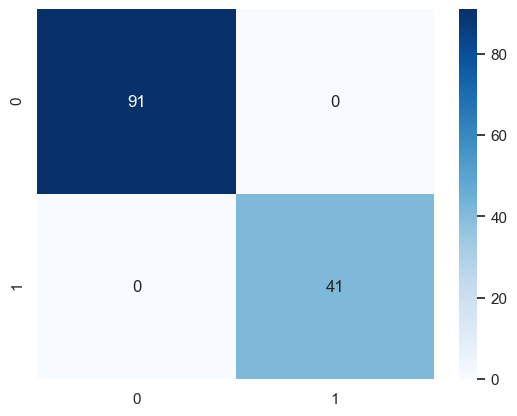

In [135]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [136]:
score=accuracy_score(y_test,y_pred)

In [137]:
score

1.0